time series ends   2011-12-30


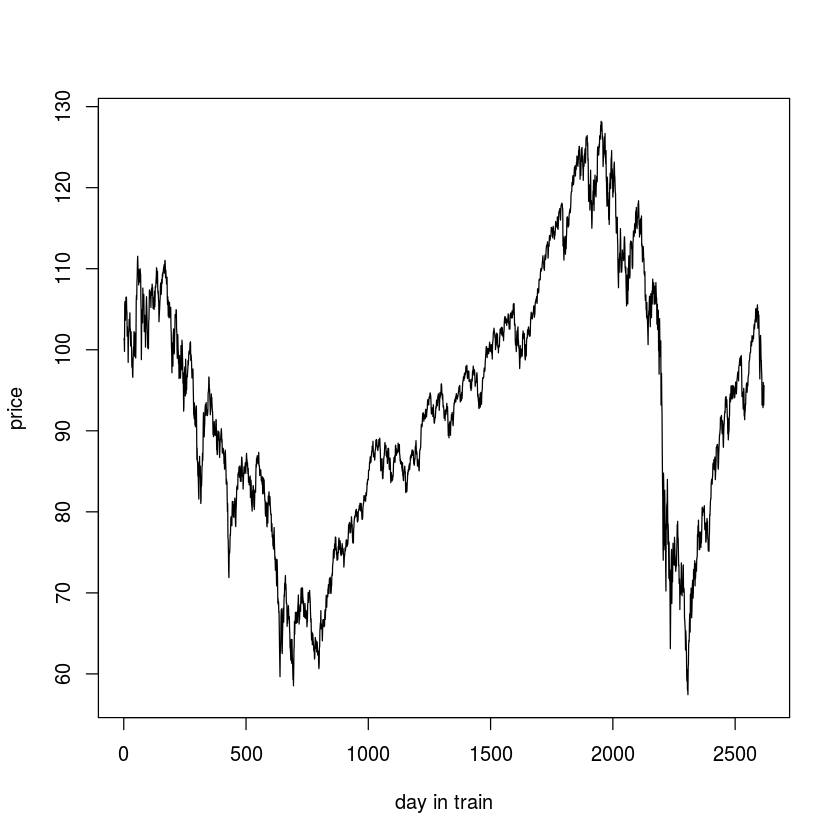

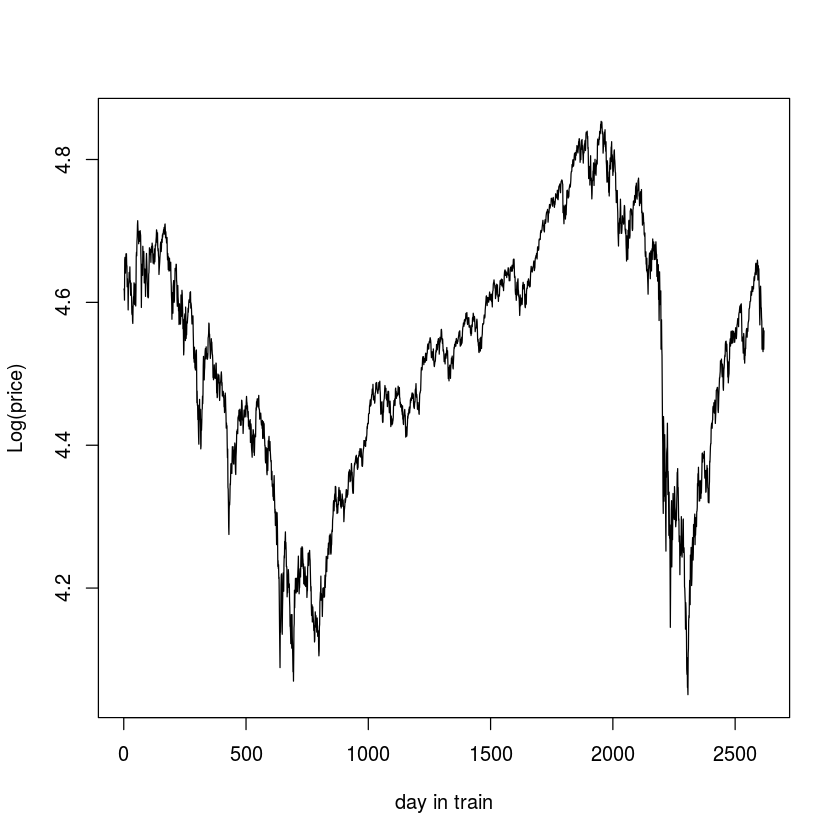

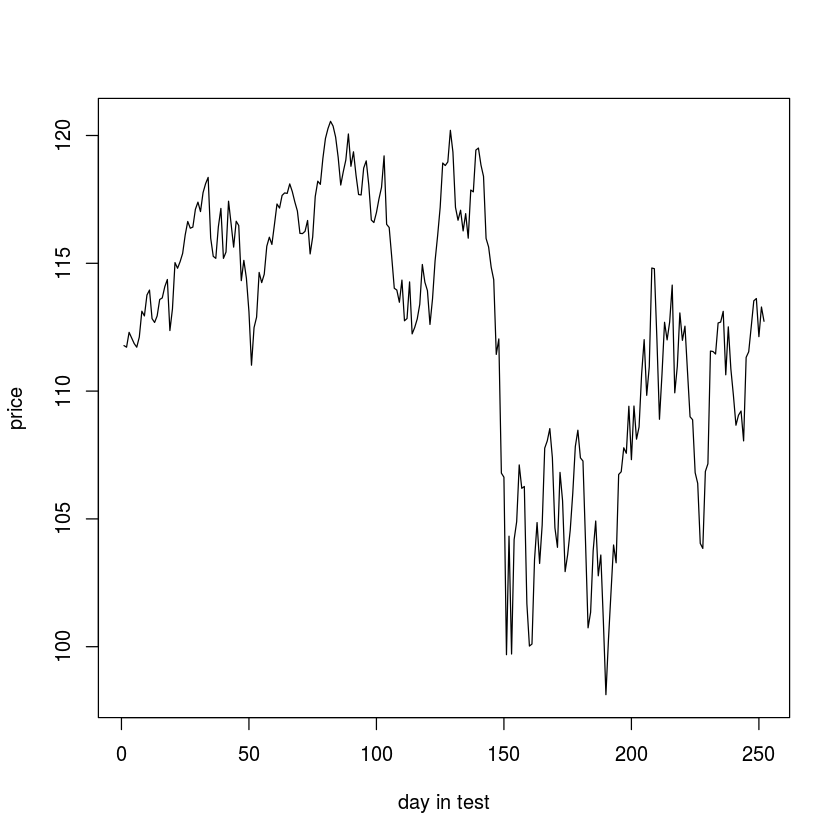

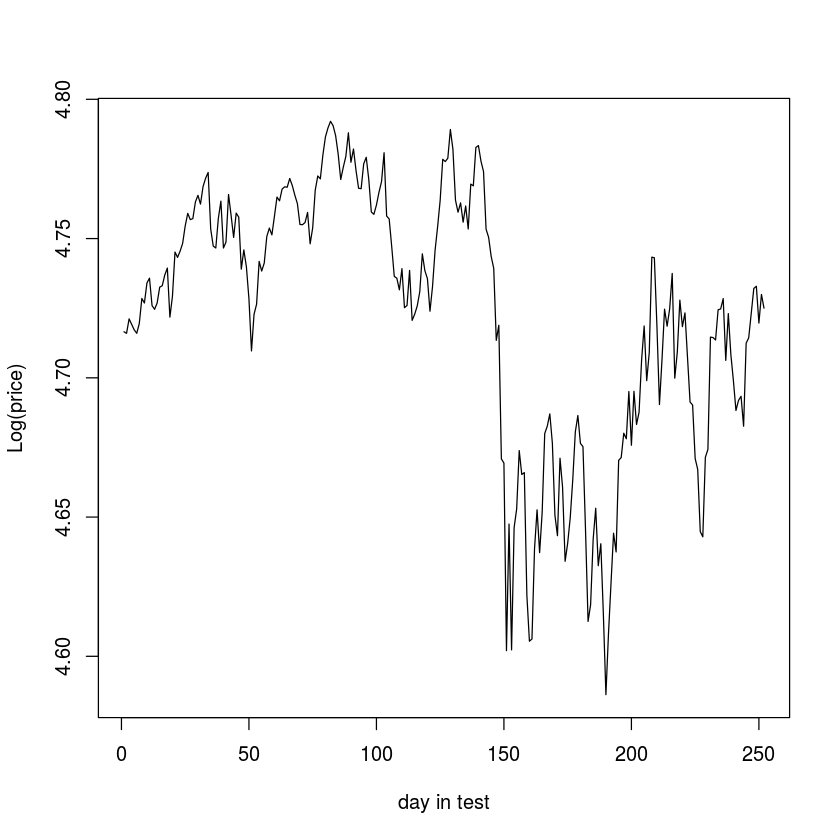

In [203]:
#install.packages('tseries')
#install.packages('CombMSC')
library(CombMSC)
library(tseries)
library(zoo)


spy = get.hist.quote(instrument = "SPY", "2000-01-04", "2011-12-31",quote = c("AdjClose"),
provider = c("yahoo"), method = NULL, compression = "d",
retclass = c("zoo"), quiet = FALSE, drop = FALSE)

#spy$train =ts(spy$train, frequency=7)

test_len = 400

spy = ts(coredata(spy), frequency = 1)
spy = splitTrainTest(spy, numTrain = length(spy) - test_len)
#spy$train
#spy$test

plot(spy$train,ylab='price', xlab='day in train')
plot(log(spy$train), ylab="Log(price)", xlab="day in train")

plot.ts(spy_test,ylab='price', xlab='day in test')
plot.ts(log(spy_test), ylab="Log(price)", xlab="day in test")


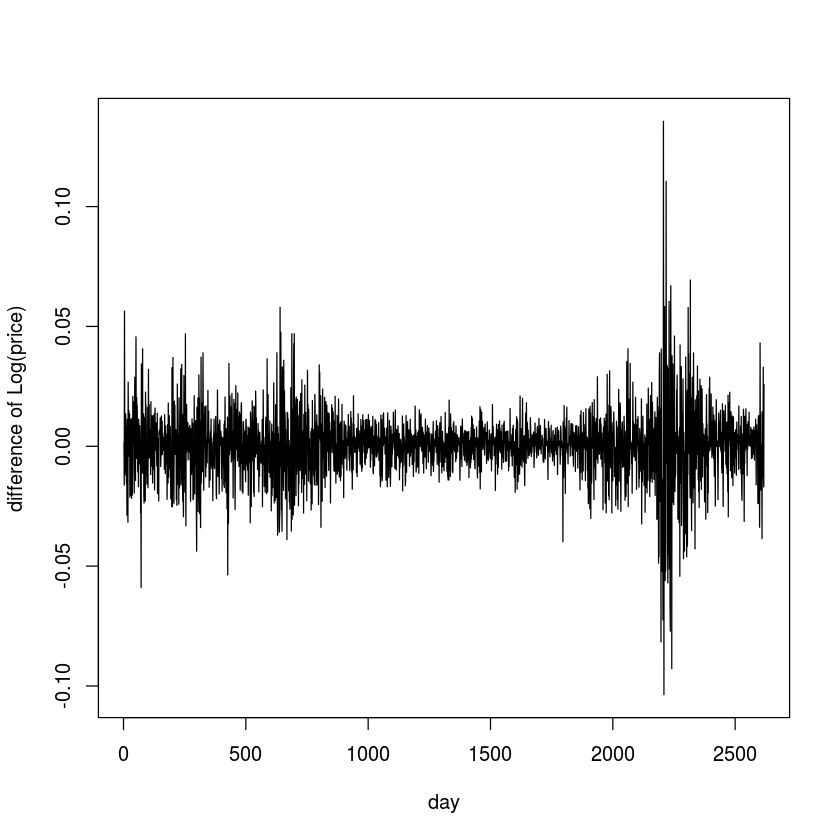

In [204]:
spy$train_diff = diff(log(spy$train))
spy$train_log = log(spy$train)
spy$test_log = log(spy$test)

plot.ts(spy$train_diff,ylab="difference of Log(price)", xlab="day")



In [ ]:
fit4 = Arima(spy$train_log, order=c(0,1,9))
fit4

fit4_forecast = forecast(fit4, h=test_len,level=c(0.95))
accuracy(fit3_forecast, spy$test_log)
plot(fit4_forecast)

In [ ]:
McLeod.Li.test(y = spy$train_diff) # test if ARCH is reasonable



In [ ]:
shapiro.test(spy$train_diff) # test if the data's normality